In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
df = pd.read_csv('Housing.csv')

GarageQual --> categorical

FireplaceQu --> categorical

SalePrice --> Target

In [42]:
data = df[['GarageQual','FireplaceQu','SalePrice']]

In [43]:
data

,GarageQual,FireplaceQu,SalePrice
0,TA,NaN,208500
1,TA,TA,181500
2,TA,TA,223500
3,TA,Gd,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,TA,Gd,266500
1458,TA,NaN,142125


In [44]:
data.isnull().sum()

,0
GarageQual,81
FireplaceQu,690
SalePrice,0


Text(0, 0.5, 'Number of Houses')

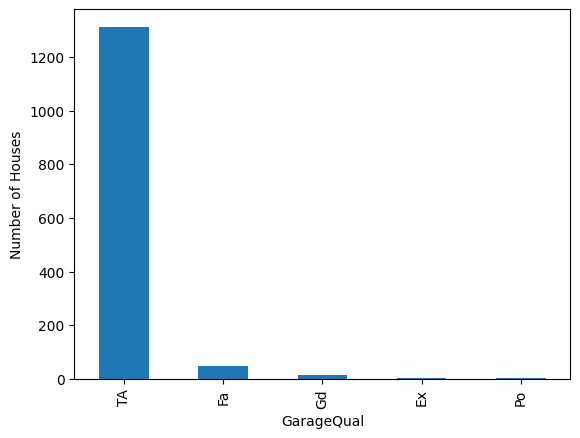

In [45]:
data['GarageQual'].value_counts().plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of Houses')

Text(0.5, 1.0, 'GarageQual')

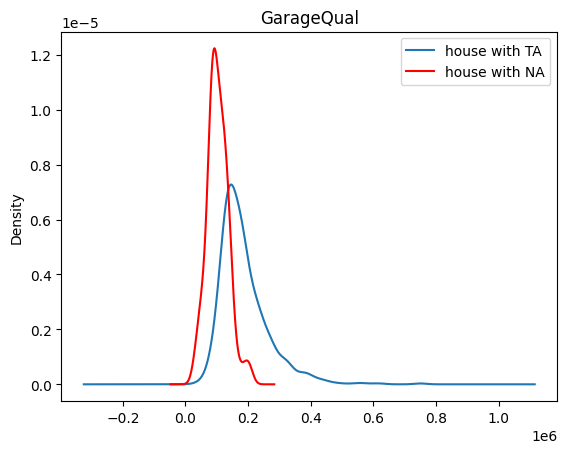

In [46]:
fig = plt.figure()
ax=fig.add_subplot(111)

data[data['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax)

data[data['GarageQual'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['house with TA','house with NA']
ax.legend(lines,labels,loc='best')
plt.title('GarageQual')

In [47]:
df['GarageQual'].mode()

,GarageQual
0,TA


In [49]:
temp = data[data['GarageQual']=='TA']['SalePrice']

In [51]:
data['GarageQual'].fillna('TA',inplace=True)

<ipython-input-51-dcecb3aad5b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['GarageQual'].fillna('TA',inplace=True)


Text(0, 0.5, 'Number of Houses')

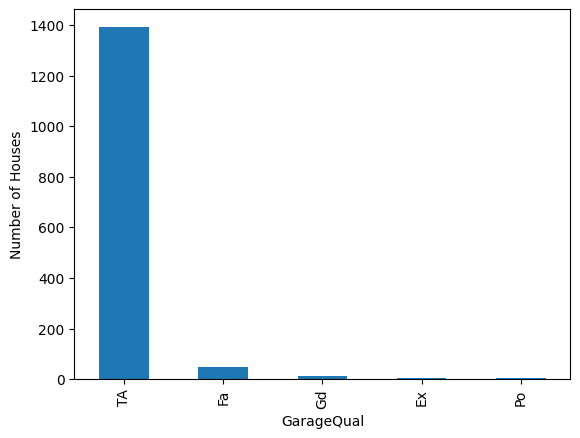

In [52]:
data['GarageQual'].value_counts().plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of Houses')

Text(0.5, 1.0, 'GarageQual')

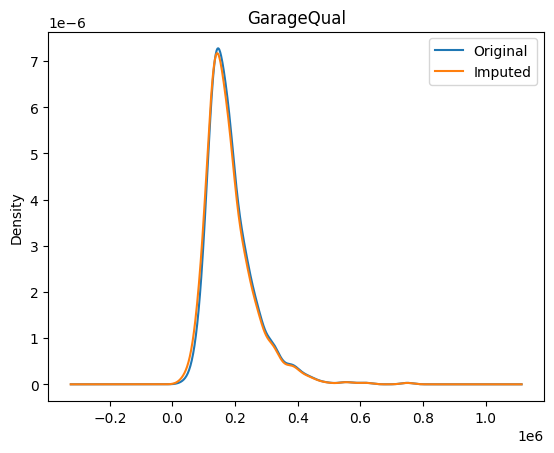

In [55]:
fig = plt.figure()
ax=fig.add_subplot(111)

temp.plot(kind='kde', ax=ax)

data[data['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax)

lines, labels = ax.get_legend_handles_labels()
labels = ['Original','Imputed']
ax.legend(lines,labels,loc='best')
plt.title('GarageQual')

<Axes: xlabel='FireplaceQu'>

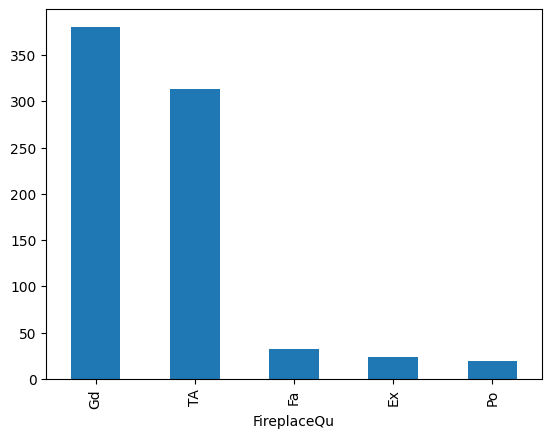

In [56]:
data['FireplaceQu'].value_counts().plot(kind='bar')

In [57]:
data['FireplaceQu'].mode()

,FireplaceQu
0,Gd


Text(0.5, 1.0, 'FireplaceQu')

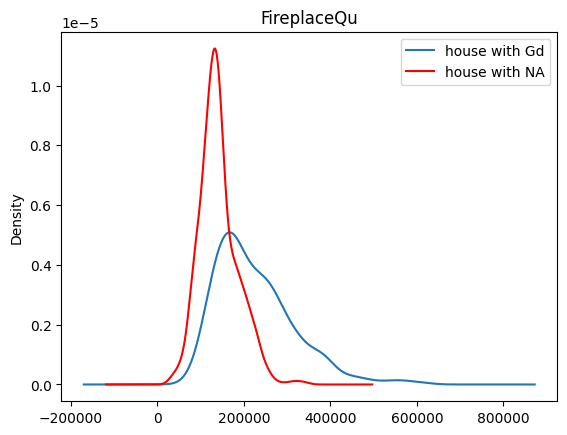

In [60]:
fig = plt.figure()
ax=fig.add_subplot(111)

data[data['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde',ax=ax)

data[data['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['house with Gd','house with NA']
ax.legend(lines,labels,loc='best')
plt.title('FireplaceQu')

In [61]:
temp = data[data['FireplaceQu']=='Gd']['SalePrice']

In [62]:
data['FireplaceQu'].fillna('Gd',inplace=True)

<ipython-input-62-6a931524dbed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['FireplaceQu'].fillna('Gd',inplace=True)


<Axes: xlabel='FireplaceQu'>

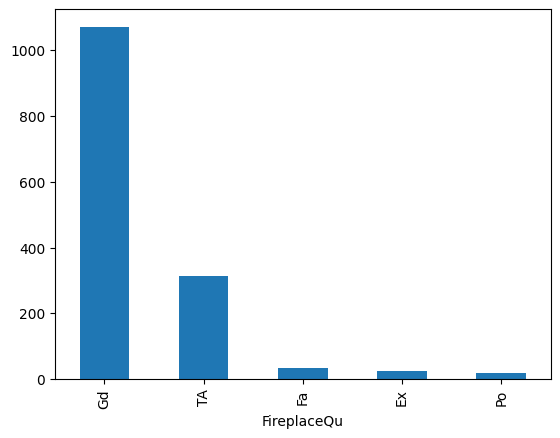

In [63]:
data['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQu')

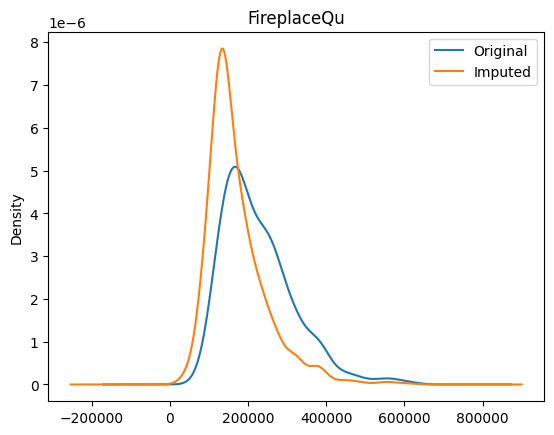

In [64]:
fig = plt.figure()
ax=fig.add_subplot(111)

temp.plot(kind='kde', ax=ax)

data[data['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde',ax=ax)

lines, labels = ax.get_legend_handles_labels()
labels = ['Original','Imputed']
ax.legend(lines,labels,loc='best')
plt.title('FireplaceQu')

we should not have filled the missing values of this column with the column's mode as before and after imputation the data is not mapping

# **Doing the same thing using sklearn**

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x_train,x_test,y_train,y_test = train_test_split(data.drop(columns=['SalePrice']),data['SalePrice'],test_size=0.2,random_state=2)

In [67]:
from sklearn.impute import SimpleImputer

In [68]:
imputer = SimpleImputer(strategy='most_frequent')

In [69]:
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

In [70]:
imputer.statistics_

array(['TA', 'Gd'], dtype=object)